In [1]:
from sys import path
path.insert(0,'../')

In [2]:
import numpy as np
import pylab as plt
import pandas as pd
from copy import deepcopy
import sklearn as sk
from pathlib import Path

from pympute import *

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data = pd.DataFrame(data=data['data'],columns=data['feature_names'])
print(data.shape)
data.head(5)

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
n1_miss,n2_miss = 50,150
masked = deepcopy(data)

cols = list(data.columns)
np.random.shuffle(cols)
cols = cols[:20]

for col in cols:
    n_miss = np.random.randint(n1_miss,n2_miss)
    i_miss = np.random.randint(0,data[col].shape[0],n_miss)
    masked.loc[i_miss,col] = np.nan
    
model = {col:'RF-r' for col in cols}

masked,hold_outs = do_holdout(masked,10)

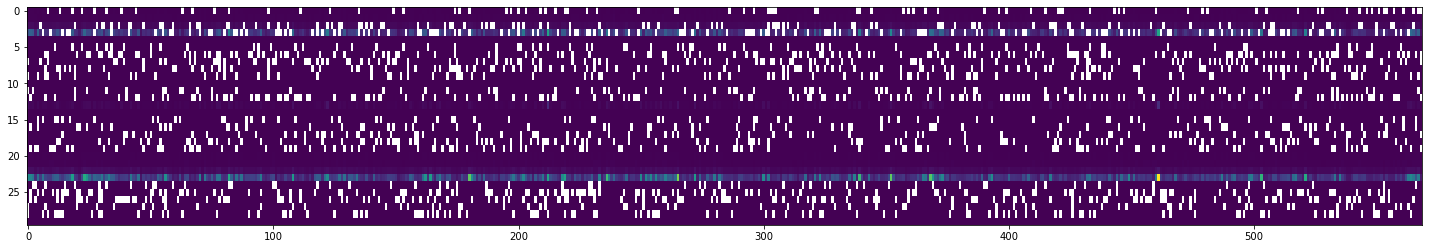

In [5]:
fig,ax = plt.subplots(figsize=(25,4))
ax.imshow(masked.T.values,interpolation='none',aspect='auto')

- More options for centralization (meanless), rescaling, 
- Important if it is longitodinal

In [6]:
normin,normax = get_range(masked)
masked_n = set_range(masked,normin,normax)
data_n = set_range(data,normin,normax)

In [7]:
#masked_n

In [8]:
devie = 'gpu'

if devie=='cpu':
    imp = Imputer(masked_n,model,loss_f=None,fill_method='random',save_history=True)
else:
    imp = GImputer(masked_n,model,loss_f=None,fill_method='random',save_history=True)

imp.impute(10,inds=None)

Available physical devices are:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


100%|██████████| 200/200 [01:28<00:00,  2.26it/s]


In [9]:
#imp.save('./')

<AxesSubplot:xlabel='iteration #', ylabel='loss function'>

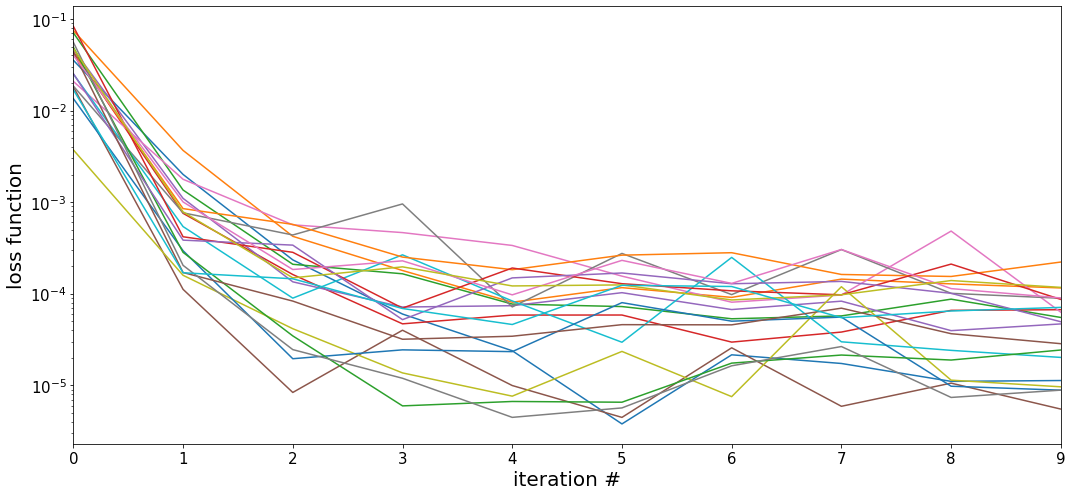

In [10]:
imp.plot_loss_frame()

In [11]:
imp.to_cpu()
imputed = imp.data_frame

def loss_func(x1,x2):
    return np.mean((x1-x2)**2)
compare_holdout(imputed,hold_outs,loss_func)

{'mean radius': 168.40647305968724,
 'mean perimeter': 9163.414343891685,
 'mean area': 476974.6181977233,
 'mean compactness': 0.03713890215119413,
 'mean concavity': 0.03172476859533854,
 'mean concave points': 0.09001139426521157,
 'mean symmetry': 0.1059424345208941,
 'mean fractal dimension': 0.07224275879608241,
 'texture error': 1.4894081721042163,
 'perimeter error': 3.3647946764820973,
 'compactness error': 0.030243139661492224,
 'concavity error': 0.0020530953843708364,
 'concave points error': 0.042551023049040924,
 'symmetry error': 0.04616449486985967,
 'fractal dimension error': 0.013037135303647807,
 'worst smoothness': 0.10586139929353167,
 'worst compactness': 0.0021586213549961626,
 'worst concavity': 0.0013357267384812065,
 'worst concave points': 0.16194666865688878,
 'worst symmetry': 0.003683025734086242}

In [12]:
#imp.models['mean texture'].coef_

No handles with labels found to put in legend.


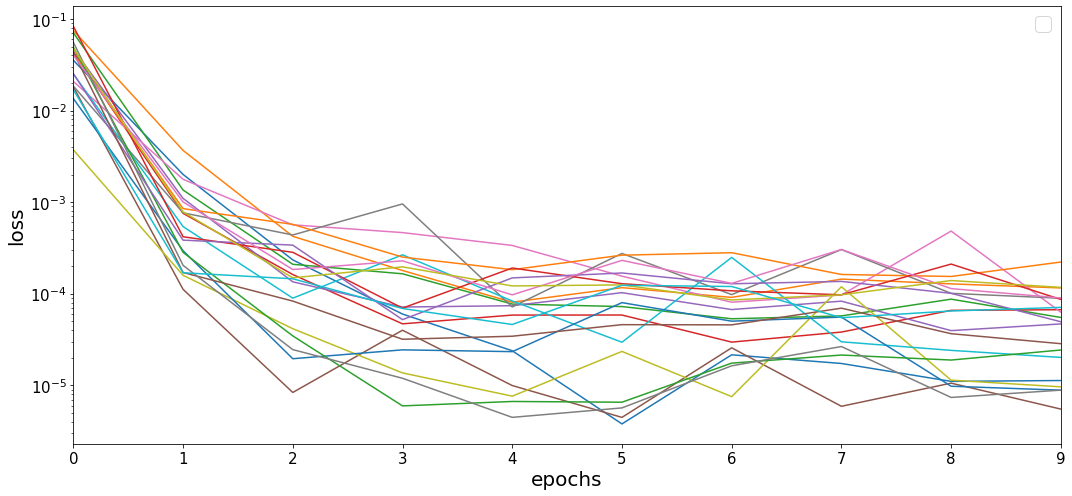

In [13]:
fig,ax = plt.subplots(figsize=(15,7))
ax = imp.plot_loss_frame(ax)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlim(0,imp.loss_frame.shape[0]-1)
ax.set_xlabel('epochs', fontsize=20)
ax.set_ylabel('loss', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_yscale('log')
ax.legend(fontsize=20)
plt.tight_layout()
#plt.savefig('loss.jpg',dpi=100)

<AxesSubplot:ylabel='comparison function'>

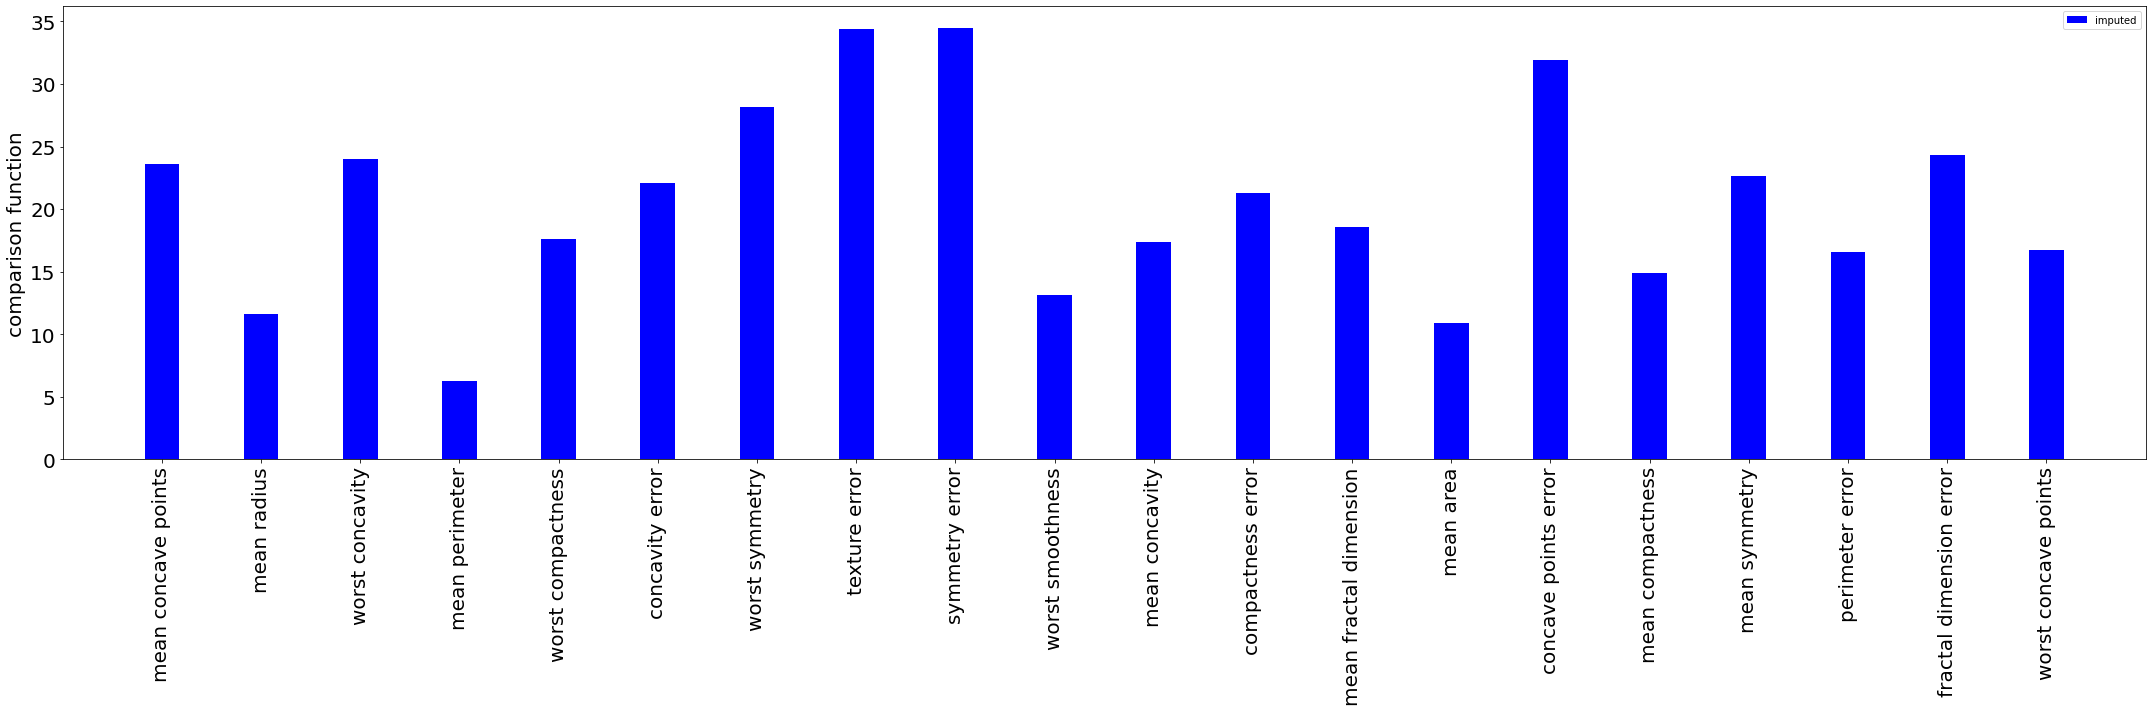

In [14]:
imp.compare(data_n,com_f=mape,with_random=False,save=None) # compaer_with ='random'

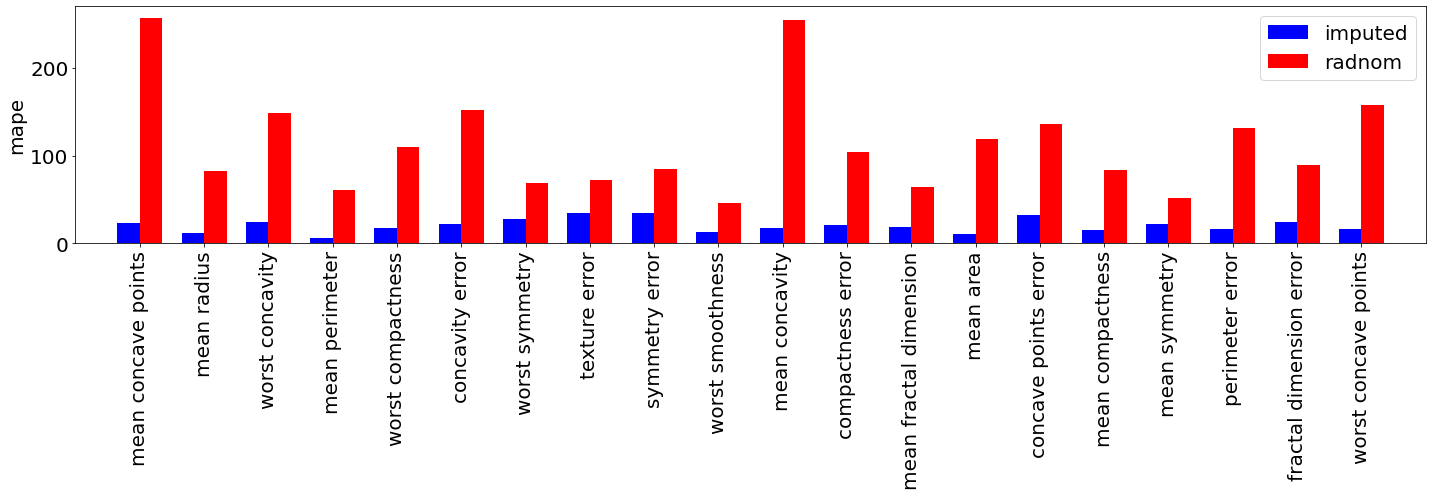

In [24]:
fig,ax = plt.subplots(figsize=(20,7))

imp.compare(data_n,com_f=mape,ax=ax,with_random=1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('mape', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize=20)
plt.tight_layout()

((0.28060958871692937, 0.10450092290217239, 0.7691324719579715),
 (0.2876851558685303, 0.1165814235806465, 0.6996232330799101))

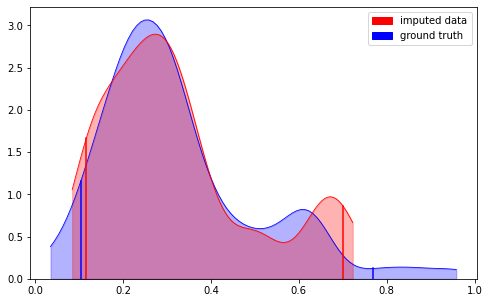

In [16]:
col = list(hold_outs.keys())[0]
imp.dist(col,truth=data_n,cl=95,bandwidth=0.05)

Add automatic bandwidth selection

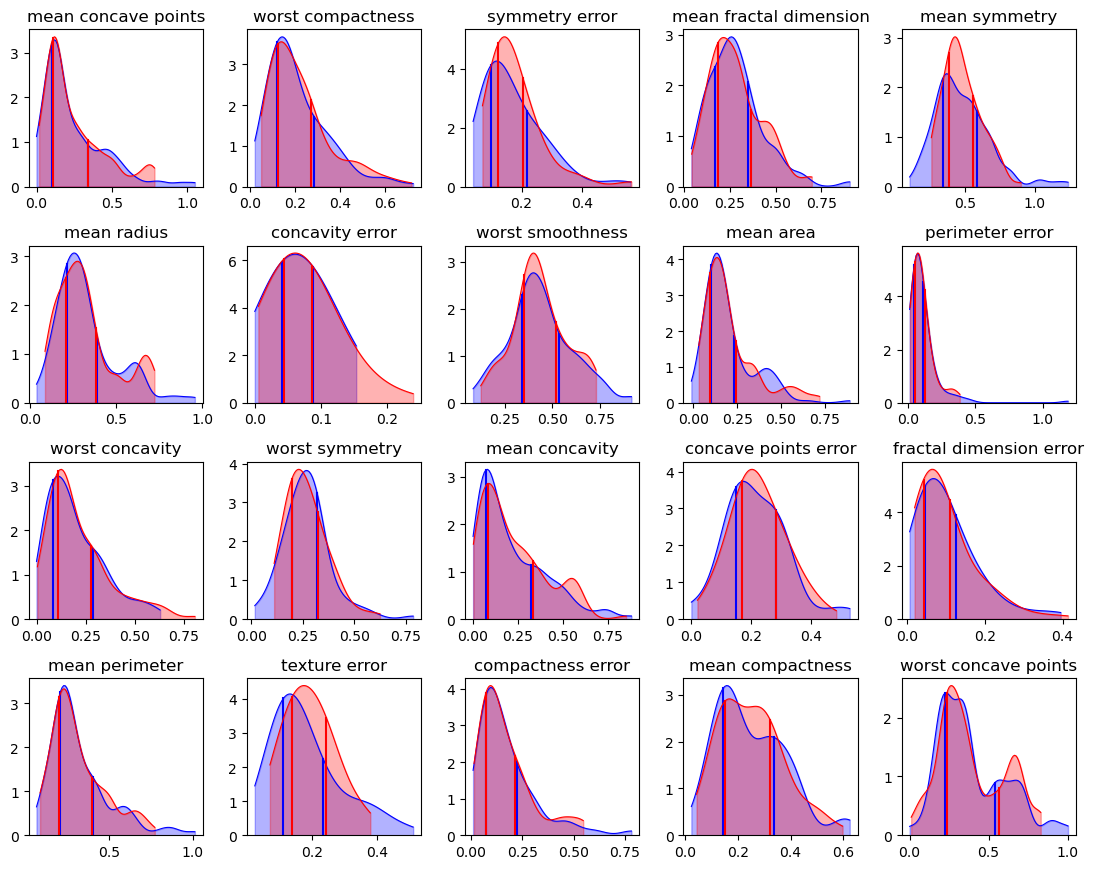

In [17]:
imp.dist_all(data_n,cl=50,bandwidth=0.05)

Adding number of tries and point estimation analysis

In [18]:
imp.general_report(data_n)

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [16]:
imp.load('./')

In [3]:
if not in_notebook():
    import argparse
    parser = argparse.ArgumentParser(description='MODEL ACTIVITY ANALYZER.')
    parser.add_argument('--dataset', default='./dataset', type=str, help='path to dataset')
    parser.add_argument('--fillm', default='random', type=str, help='filling initiation')
    parser.add_argument('--mlm', default='LR', type=str, help='ML method')
    parser.add_argument('--nl', default=4, type=int, help='NN # of layers')
    parser.add_argument('--batchnorm', default=0, type=int, help='batch norm layer for NN')
    parser.add_argument('--dropout', default=0.0, type=float, help='dropout layer for NN')
    parser.add_argument('--iterate', default=0, type=int, help='# iteration')
    parser.add_argument('--dtime', default=0, type=int, help='data section time')
    parser.add_argument('--prefix', default='', type=str, help='prefix')
    
    args = parser.parse_args()
    data_path = args.dataset
    fill_method = args.fillm
    mlm = args.mlm
    nlayer = args.nl
    batchnorm = args.dropout
    dropout = args.dropout
    n_iterate = args.iterate
    dtime = args.dtime
    prefix = args.prefix

else:
    data_path = '../jiang/SimulationLabData/data/'
    fill_method='random'
    mlm = 'LR'
    nlayer = 4
    batchnorm = 1
    dropout = 0.1
    n_iterate = 10
    dtime = 1
    prefix = ''

if dtime<2:
    dtime = '_'+str(dtime)
elif dtime==2:
    dtime = ''
else:
    assert 0,'dtime is not recognized!'

realization = '2nd'


if mlm in skmodels.keys():
    prefix = prefix+'{}-{}'.format(fill_method,mlm)
    kargs = {}
    model_ = skmodels[mlm]
elif mlm=='NN':
    prefix = prefix+'{}-NN-nl{}-bt{}-do{}'.format(fill_method,nlayer,batchnorm,dropout)
    kargs = {'epochs':3,'verbose':0}

    def model_():
        return dense_model(inp=44,
                           out=1,
                           nlayer=nlayer,
                           batchnorm=batchnorm,
                           dropout=dropout,
                           loss='mean_squared_error',
                           optimizer='adam',
                           kernel_initializer='normal')
    
    model = model_()
    model.summary()
else:
    assert 0,'model not regognized!'

# Path('results2').mkdir(parents=True, exist_ok=True)
# Path('results2/'+prefix).mkdir(parents=True, exist_ok=True)

model_path = 'results/'+prefix+'/'

data = pd.read_hdf('data_{}{}.h5'.format(realization,dtime),'data').drop(columns=['PT_ID'])
masked = pd.read_hdf('data_{}{}.h5'.format(realization,dtime),'masked').drop(columns=['PT_ID'])

normin,normax = get_rescale(masked.values)
masked_n = set_rescale(masked,normin,normax)
data_n = set_rescale(data,normin,normax)

imp = Imputer(masked_n,model_,loss_f=None,fill_method=fill_method,save_history=True)
if os.path.exists(model_path+'model.pkl'):
    imp.load(model_path)

imp.impute(n_iterate,inds=None,**kargs)
imp.save(model_path)


No handles with labels found to put in legend.


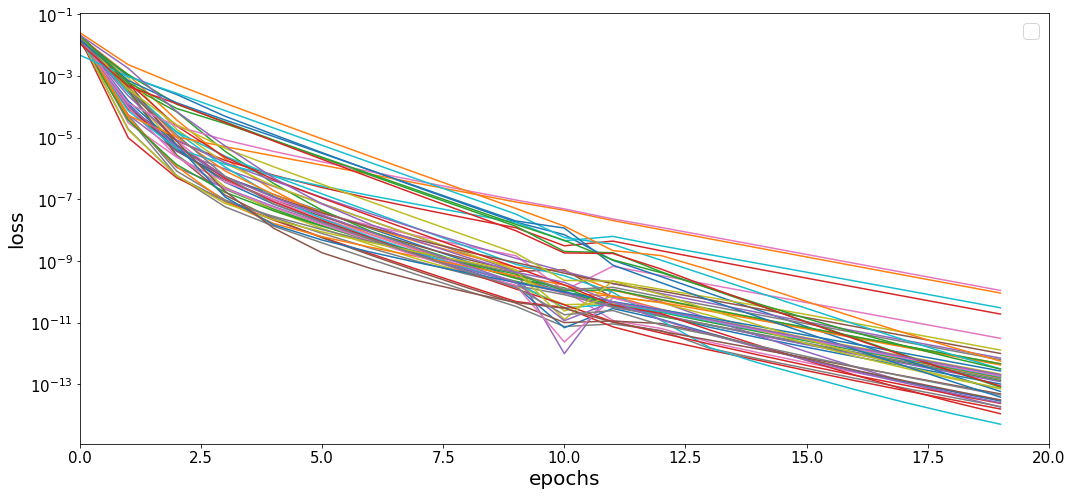

In [18]:
fig,ax = plt.subplots(figsize=(15,7))
ax = imp.plot_loss_frame(ax)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlim(0,imp.loss_frame.shape[0])
ax.set_xlabel('epochs', fontsize=20)
ax.set_ylabel('loss', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_yscale('log')
ax.legend(fontsize=20)
plt.tight_layout()
plt.savefig(model_path+'loss.jpg',dpi=100)

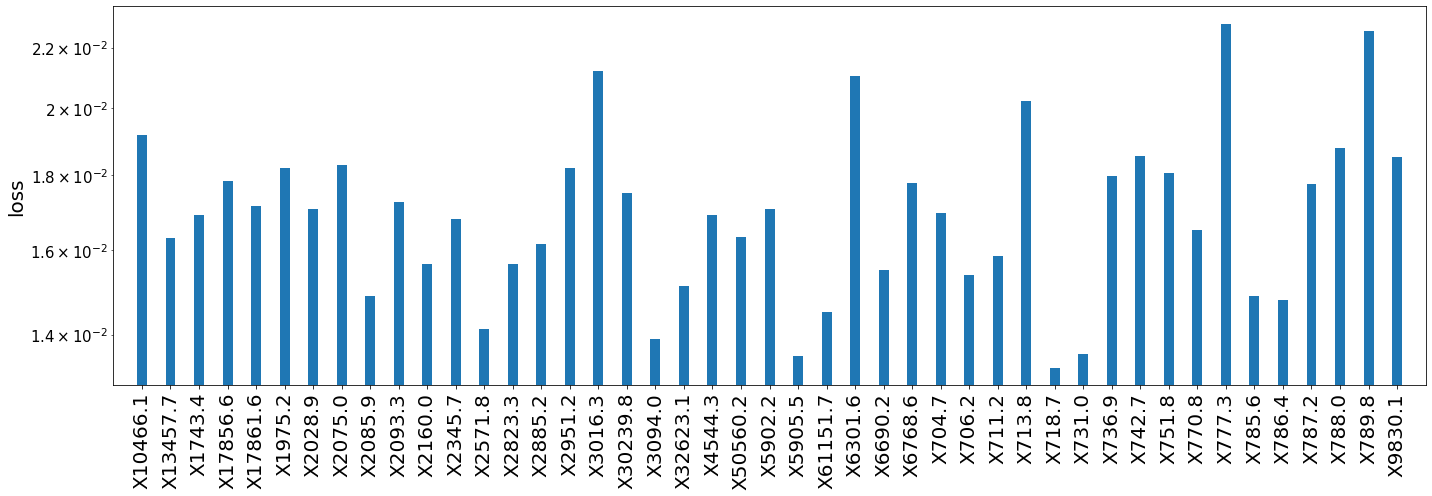

In [22]:
fig,ax = plt.subplots(figsize=(20,7))

imp.compare(data_n,ax)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('loss', fontsize=20)
ax.set_xticks(np.arange(imp.ncol))
ax.set_xticklabels(imp.cols,rotation=90)
ax.set_xlim(-1,imp.ncol)
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=15)
# ax.legend(fontsize=20)
plt.tight_layout()
plt.savefig(model_path+'labs.jpg',dpi=100)